# Machine Learning using KNN and K Means Clustering to predict and classify users based on the IOT data.

In [30]:
from random import randrange
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import configparser
import os
sns.set_style("whitegrid", {'axes.grid' : False})
%matplotlib inline

In [31]:
def check_folder(folder_name):
    if not os.path.exists(folder_name):
        print('Making the {} folder to save the model'.format(folder_name))
        os.makedirs(folder_name)
    else:
        print('Folder {} exists'.format(folder_name))
    
print('loading the config file')
config = configparser.ConfigParser()
config_fileName = ('config.ini')
config.read(config_fileName)
datafolder_model =config['MODEL']['MODEL_FOLDER']
datafolder_ge = config['DATASET']['DATA_FOLDER_GE']
plotsfolder = config['PLOTS']['PLOT_FOLDER']

check_folder(datafolder_model)
check_folder(datafolder_ge)
check_folder(plotsfolder)

    

loading the config file
Folder models exists
Folder data_ge exists
Folder plots exists


In [32]:

def print_df_info(battery_df, bat_no=3):
    '''
    @param battery_df: list of available dataframes
    @param bat_no: Number of battery type that we have dataset (csv file) for each
    This function will print .info() of all dataframes
    
    '''
    if not battery_df:
        print ('No dataframe is loaded')
        return
    if (bat_no ==0) or (len(battery_df)==0):
        print('please properly specify No of the battery datasets')
        return
    for bt in range(bat_no):
        print('\n***********************************************************************************************************')
        print('*************************** Print Info and Head of dataframe of battery type {}****************************'.format(str(bt+1)))
        print(battery_df[bt].info())
    

def print_df_head(battery_df, bat_no=3, No=3):
    '''
    @param battery_df: list of available dataframes
    @param bat_no: Number of battery type that we have dataset (csv file) for each
    @param No: number of head records to print for each dataframe
    This function will print .head() of all dataframes
    
    '''
    if not battery_df:
        print ('No dataframe is loaded')
        return
    if (bat_no ==0) or (len(battery_df)==0):
        print('please properly specify No of the battery datasets')
        return
    for bt in range(bat_no):
        print('\n***********************************************************************************************************')
        print('*************************** Print Info and Head of dataframe of battery type {}****************************'.format(str(bt+1)))
        print(battery_df[bt].head(No))
            
def print_statistics(battery_df, bat_no=3):
    '''
    @param battery_df: list of available dataframes
    @param bat_no: Number of battery type that we have dataset (csv file) for each
    This function will print som statiscs of dataframes including MAX Cycles, Max Users, and Max records
    
    '''
    if not battery_df:
        print ('No dataframe is loaded')
        return
    if (bat_no ==0) or (len(battery_df)==0):
        print('please properly specify No of the battery datasets')
        return
    for bt in range(bat_no):
        print('*************************** Print Info and Head of dataframe of battery type {}****************************'.format(str(bt+1)))
        print ('battery type:\t {}, Max No of Cycles:\t {}'.format(str(bt+1),input_df_list[bt].Battery_Cycle_No.max()))
        print ('battery type:\t {}, Max No of users:\t {}'.format(str(bt+1), input_df_list[bt].u_id.unique().size))
        print('battery type:\t {}, Max No of records:\t {}'.format(str(bt+1),battery_df[bt].Battery_Type.value_counts()))

**rading the data into pandas dataframe and getting overview**

In [33]:
bat_no = 3
ml_data = []
for bt in range(bat_no):
    file_name_with_path = '{}{}battery{}_labeled_v2.csv'.format(datafolder_ge,os.sep,str(bt+1))

    
    ml_data.append(pd.read_csv(file_name_with_path))
print_df_info(ml_data)    


***********************************************************************************************************
*************************** Print Info and Head of dataframe of battery type 1****************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53082 entries, 0 to 53081
Data columns (total 9 columns):
u_id                53082 non-null int64
User_Type           53082 non-null int64
Date                53082 non-null object
Battery_Status_1    53082 non-null int64
Battery_Status_2    53082 non-null int64
week                53082 non-null int64
frac_charge         53082 non-null float64
frac_discharge      53082 non-null float64
health_status       52774 non-null float64
dtypes: float64(3), int64(5), object(1)
memory usage: 3.6+ MB
None

***********************************************************************************************************
*************************** Print Info and Head of dataframe of battery type 2****************************
<class 'pandas.co

**Head of the dataframe to see how the data look like**

In [34]:
print_df_head(ml_data)


***********************************************************************************************************
*************************** Print Info and Head of dataframe of battery type 1****************************
   u_id  User_Type        Date  Battery_Status_1  Battery_Status_2  week  \
0  1507          1  2018-01-01                 0                21     1   
1  1507          1  2018-01-08                 6               162     2   
2  1507          1  2018-01-15                 6               162     3   

   frac_charge  frac_discharge  health_status  
0     0.000000        1.000000            3.0  
1     0.035714        0.964286            3.0  
2     0.035714        0.964286            3.0  

***********************************************************************************************************
*************************** Print Info and Head of dataframe of battery type 2****************************
   u_id  User_Type        Date  Battery_Status_1  Battery_Status_2  wee

In [35]:
print(ml_data[0].columns)

Index(['u_id', 'User_Type', 'Date', 'Battery_Status_1', 'Battery_Status_2',
       'week', 'frac_charge', 'frac_discharge', 'health_status'],
      dtype='object')


In [36]:
for bt in range(bat_no):
    ml_data[bt].drop(['u_id', 'Date', 'User_Type'], axis=1,inplace = True)

In [37]:
print_df_head(ml_data)


***********************************************************************************************************
*************************** Print Info and Head of dataframe of battery type 1****************************
   Battery_Status_1  Battery_Status_2  week  frac_charge  frac_discharge  \
0                 0                21     1     0.000000        1.000000   
1                 6               162     2     0.035714        0.964286   
2                 6               162     3     0.035714        0.964286   

   health_status  
0            3.0  
1            3.0  
2            3.0  

***********************************************************************************************************
*************************** Print Info and Head of dataframe of battery type 2****************************
   Battery_Status_1  Battery_Status_2  week  frac_charge  frac_discharge  \
0                 1                20     1     0.047619        0.952381   
1                 1               1

In [38]:
for bt in range(bat_no):
    print('*********************************************************************************************************\n\
***************************** Battery Health Status for battery type {}***********************************'.format(str(bt+1)))
    ml_data[bt]['randNumCol'] = np.random.randint(1, 4, ml_data[bt].shape[0])
    print('Our labels: ')
    print(ml_data[bt].health_status.value_counts())
    print('Random Labels:')
    print(ml_data[bt].randNumCol.value_counts())
    ml_data[bt].dropna(inplace=True)


*********************************************************************************************************
***************************** Battery Health Status for battery type 1***********************************
Our labels: 
3.0    29833
1.0    17950
2.0     4991
Name: health_status, dtype: int64
Random Labels:
3    17698
1    17693
2    17691
Name: randNumCol, dtype: int64
*********************************************************************************************************
***************************** Battery Health Status for battery type 2***********************************
Our labels: 
3.0    42285
1.0     7376
2.0     2456
Name: health_status, dtype: int64
Random Labels:
2    17479
1    17376
3    17363
Name: randNumCol, dtype: int64
*********************************************************************************************************
***************************** Battery Health Status for battery type 3***********************************
Our labels: 
3.0    25349
1.0    2

In [39]:
print_df_info(ml_data)


***********************************************************************************************************
*************************** Print Info and Head of dataframe of battery type 1****************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 52774 entries, 0 to 53080
Data columns (total 7 columns):
Battery_Status_1    52774 non-null int64
Battery_Status_2    52774 non-null int64
week                52774 non-null int64
frac_charge         52774 non-null float64
frac_discharge      52774 non-null float64
health_status       52774 non-null float64
randNumCol          52774 non-null int32
dtypes: float64(3), int32(1), int64(3)
memory usage: 3.0 MB
None

***********************************************************************************************************
*************************** Print Info and Head of dataframe of battery type 2****************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 52117 entries, 0 to 52217
Data columns (total 7 colu

In [40]:
print( ml_data[0].columns)

Index(['Battery_Status_1', 'Battery_Status_2', 'week', 'frac_charge',
       'frac_discharge', 'health_status', 'randNumCol'],
      dtype='object')


## So, our data is ready for Machine Learning!
## `K nearest neighbors (KNN) model` -- Supervised Learning

In [41]:
# Saperating features and the target columns
X=[]
y=[]
for bt in range(bat_no):
    X.append(ml_data[bt].drop(['health_status',
                               'frac_discharge',
                               'frac_charge',
                               'health_status'],
                              axis=1))
    y.append(ml_data[bt]['randNumCol'])

In [42]:
# Train test split
X_train = []
X_test = []
y_train = []
y_test = []
for bt in range(bat_no):
    X.append(pd.DataFrame())
    y.append(pd.DataFrame())
    X_train.append(pd.DataFrame())
    X_test.append(pd.DataFrame())
    y_train.append(pd.DataFrame())
    y_test.append(pd.DataFrame())
    X_train[bt], X_test[bt], y_train[bt], y_test[bt] = train_test_split(
        X[bt], y[bt], test_size=0.30, random_state=42)

In [43]:
print_df_head(X_train,3,3)


***********************************************************************************************************
*************************** Print Info and Head of dataframe of battery type 1****************************
       Battery_Status_1  Battery_Status_2  week  randNumCol
18817               120                48    26           1
15576                37               131    25           1
6210                  3                18     1           2

***********************************************************************************************************
*************************** Print Info and Head of dataframe of battery type 2****************************
       Battery_Status_1  Battery_Status_2  week  randNumCol
33739                29               139    44           1
22580                 9               159     9           2
41118                 1               167    25           3

***************************************************************************************

In [44]:
print_df_head(y_train)


***********************************************************************************************************
*************************** Print Info and Head of dataframe of battery type 1****************************
18817    1
15576    1
6210     2
Name: randNumCol, dtype: int32

***********************************************************************************************************
*************************** Print Info and Head of dataframe of battery type 2****************************
33739    1
22580    2
41118    3
Name: randNumCol, dtype: int32

***********************************************************************************************************
*************************** Print Info and Head of dataframe of battery type 3****************************
35999    3
24803    3
17503    2
Name: randNumCol, dtype: int32


In [45]:
print_df_head(X_test)


***********************************************************************************************************
*************************** Print Info and Head of dataframe of battery type 1****************************
       Battery_Status_1  Battery_Status_2  week  randNumCol
28539               150                18    28           1
51172               148                20    35           2
4698                  2                19     1           1

***********************************************************************************************************
*************************** Print Info and Head of dataframe of battery type 2****************************
       Battery_Status_1  Battery_Status_2  week  randNumCol
10696                 2               166     5           3
50925                 6               162     4           1
16082                35               133    45           1

***************************************************************************************

In [46]:
print_df_head(y_test)


***********************************************************************************************************
*************************** Print Info and Head of dataframe of battery type 1****************************
28539    1
51172    2
4698     1
Name: randNumCol, dtype: int32

***********************************************************************************************************
*************************** Print Info and Head of dataframe of battery type 2****************************
10696    3
50925    1
16082    1
Name: randNumCol, dtype: int32

***********************************************************************************************************
*************************** Print Info and Head of dataframe of battery type 3****************************
12243    2
31557    2
37530    3
Name: randNumCol, dtype: int32


**Imorting K neighbours Classifier, classification report and confusion matrix**

In [47]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.externals import joblib

## Train Models and Save them

In [48]:
def train_save_models(X_train,y_train,bat_no, nn,datafolder_model):
    knn = []
    for bt in range(bat_no):
        # Creating model instance
        knn.append(KNeighborsClassifier(n_neighbors=nn) )
        #Train the model
        knn[bt].fit(X_train[bt], y_train[bt])
        print('\n***************************************************************************************************************************')
        print('*************************** save the model  of dataframe of battery type {} to disk****************************'.format(str(bt+1)))

        # save the model to disk
        filename = datafolder_model +os.sep+'bat{}_model.sav'.format(str(bt+1))
        

        joblib.dump(knn[bt], filename) 
        
# Starting with n_neighbors = 1, let's see how the model works!
# Saving model to the disk for later use.
train_save_models(X_train, y_train,bat_no, 1, datafolder_model)


***************************************************************************************************************************
*************************** save the model  of dataframe of battery type 1 to disk****************************

***************************************************************************************************************************
*************************** save the model  of dataframe of battery type 2 to disk****************************

***************************************************************************************************************************
*************************** save the model  of dataframe of battery type 3 to disk****************************


## Load Models and use them

**Let see how the model worked from `Classification Report` and `Confusion Matrix`.**

In [49]:
def load_eval_model(X_test,y_test,bat_no,datafolder_model):
    #Load and evaluate the models
    knn = []
    predictions =[]
    for bt in range(bat_no):        
        filename = datafolder_model +os.sep +'bat{}_model.sav'.format(str(bt+1))
        
        
        knn.append(joblib.load(filename) )
        #Train the model
        predictions.append(knn[bt].predict(X_test[bt]))
        print('\n***************************************************************************************************************************')
        print('*************************** Print Confusion Matrix and report of dataframe of battery type {}****************************'.format(str(bt+1)))
        print(confusion_matrix(y_test[bt], predictions[bt]))
        print(classification_report(y_test[bt],predictions[bt]))

load_eval_model(X_test,y_test,bat_no,datafolder_model) 


***************************************************************************************************************************
*************************** Print Confusion Matrix and report of dataframe of battery type 1****************************
[[5245   97    8]
 [  55 5115   84]
 [   3   79 5147]]
              precision    recall  f1-score   support

           1       0.99      0.98      0.98      5350
           2       0.97      0.97      0.97      5254
           3       0.98      0.98      0.98      5229

   micro avg       0.98      0.98      0.98     15833
   macro avg       0.98      0.98      0.98     15833
weighted avg       0.98      0.98      0.98     15833


***************************************************************************************************************************
*************************** Print Confusion Matrix and report of dataframe of battery type 2****************************
[[5142   34    9]
 [  34 5282   16]
 [   9   32 5078]]
              pre

**From the results above, we see that KNN is working amazingly fine to predict the health of the battery. We have used only one neighbors (n_neighbors = 1) in our model. Please note that the labels are set manually and are highly correlated with the charging/discharging time and cycle. It is expected to have such results from KNN model on the simulated data set. <br>We may not need to find the optimum value of K under such circumstances however, we can see how the elbow method works!**

In [50]:
def elbow_testing(X_train,y_train,X_test,y_test, k_start,k_end,bat_no):
    err_rate = []
    prediction_i =[]
    knn=[]
    for bt in range(bat_no):
        # Initializing an empty list to get the error rate for every k 
        err_rate.append([])
        prediction_i.append([])
        knn.append(KNeighborsClassifier(n_neighbors=1))
        for i in range(k_start,k_end+1):
            # Initializing knn for k = i
            knn[bt] = KNeighborsClassifier(n_neighbors=i) 
            # fitting knn 
            knn[bt].fit(X_train[bt],y_train[bt])
            # predicting for k = i
            prediction_i[bt] = knn[bt].predict(X_test[bt])
            # error rate for k = i - appending to the list 'err_rate'
            # Avg of predictions and y_test if both not equal
            err_rate[bt].append(np.mean(prediction_i[bt] != y_test[bt]))
        plt.figure(figsize=(8,4))
        plt.plot(range(k_start,k_end+1),err_rate[bt],color='green', marker='o',markerfacecolor='blue')
        plt.title('Error Rate vs. K Value for battery type'+str(bt+1))
        plt.xlabel('K_Value')
        plt.ylabel('Error_Rate')

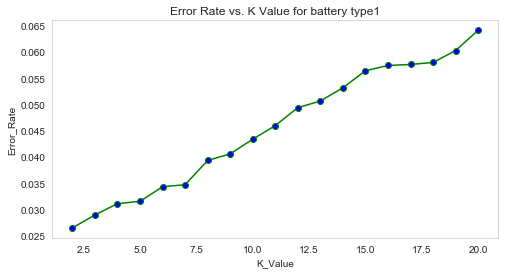

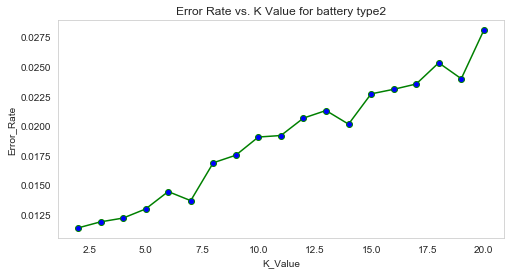

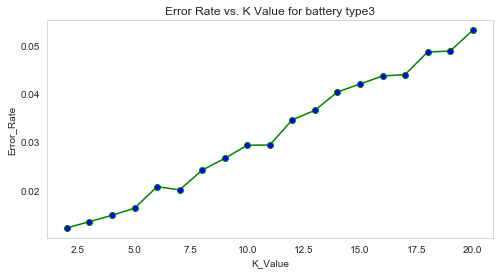

In [54]:
elbow_testing(X_train,y_train,X_test,y_test, 1,20,bat_no)

**We see, it is not worth running the Elbow method. However, it might be a good idea to see the performance of KNN using K other than 1 e.g. n_neighbours = 3. We can try other number as well!**

In [55]:
n_neighbors=3
train_save_models(X_train,y_train,bat_no, n_neighbors,datafolder_model)
load_eval_model(X_test,y_test,bat_no,datafolder_model)


***************************************************************************************************************************
*************************** save the model  of dataframe of battery type 1 to disk****************************

***************************************************************************************************************************
*************************** save the model  of dataframe of battery type 2 to disk****************************

***************************************************************************************************************************
*************************** save the model  of dataframe of battery type 3 to disk****************************

***************************************************************************************************************************
*************************** Print Confusion Matrix and report of dataframe of battery type 1****************************
[[5212  128   10]
 [ 129 5056   69]
 [  17  10

## KMeans Clustering -- Unsupervised learning model
In principal, this is unsupervised problem for the given dataset. We better run K-Means Clustering algorithm to see how the data is clustered based on the given features for the health of the battery.<br> **Let's start with elbow plot to find the optimum value of k (no of expected clusters).**</font>

In [56]:
from sklearn.cluster import KMeans

In [57]:
# start and the end value to check for K 
start_k = 1
end_k = 10
# sum_square will be key,value pair for the elbow plot for each battery type!
sum_square =[]
for bt in range(bat_no):
    # sum_square will be key,value pair for the elbow plot!
    sum_square.append({})
    # Let's test for K from 1 to 10, we can use range() function here! remember?
    for k in range(start_k, end_k):
        kmeans = KMeans(n_clusters=k).fit(ml_data[bt].drop(['health_status','frac_charge', 'frac_discharge','randNumCol'],axis=1))
        # .inertia: Computing Sum of Squared Distances of samples to their closest cluster center.
        sum_square[bt][k] = kmeans.inertia_ 

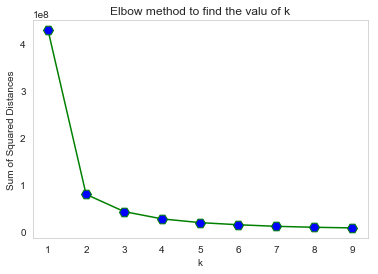

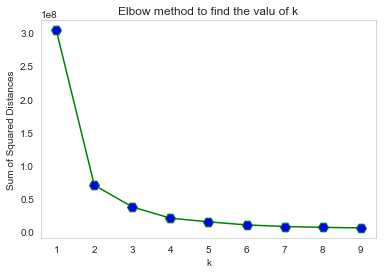

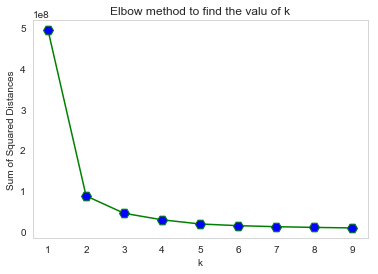

In [58]:
for bt in range(bat_no):
    plt.plot(list(sum_square[bt].keys()), list(sum_square[bt].values()),
             linestyle ='-', marker = 'H', color = 'g',
             markersize = 10,markerfacecolor = 'b')
    plt.xlabel('k')
    plt.ylabel('Sum of Squared Distances')
    plt.title('Elbow method to find the valu of k')
    
    plt.savefig('{}{}kmeans_clustering_elbow_bat{}.png'.format(plotsfolder,os.sep,str(bt+1)))
    

    plt.show()

**From the above elbow plots, K = 3 looks a good value for clustering!**<br>

In [59]:
kmeans = []
centers = []
for bt in range(bat_no):
    # Creating kmens instance with thee number of clusters as predected from the elbow chart given above.
    kmeans.append( KMeans(n_clusters=3))
    # Fitting the model to our dataset
    kmeans[bt].fit(ml_data[bt].drop(['health_status','frac_charge', 'frac_discharge','randNumCol'], axis=1))
    # Cluster centeriods
    centers.append(kmeans[bt].cluster_centers_)
    print ('bat{} battery types cluster centeriods are:'.format( str(bt+1)))
    print (centers[bt])

bat1 battery types cluster centeriods are:
[[151.48562861  16.51437139  36.49468145]
 [ 18.40080399 149.59919601  19.73855431]
 [ 68.03582706  69.72504251  21.90429925]]
bat2 battery types cluster centeriods are:
[[  8.61955162 159.38044838  23.14056309]
 [146.66020435  21.33979565  39.70290804]
 [ 48.39408787  75.45810877  23.59317328]]
bat3 battery types cluster centeriods are:
[[ 73.21799486  70.32730077  25.60935733]
 [156.20396601  11.79603399  34.94417597]
 [ 18.11666444 149.88333556  16.02561361]]


** Let's see how the clusters look like, we can put the computed cluster centeriods from our trained model!**

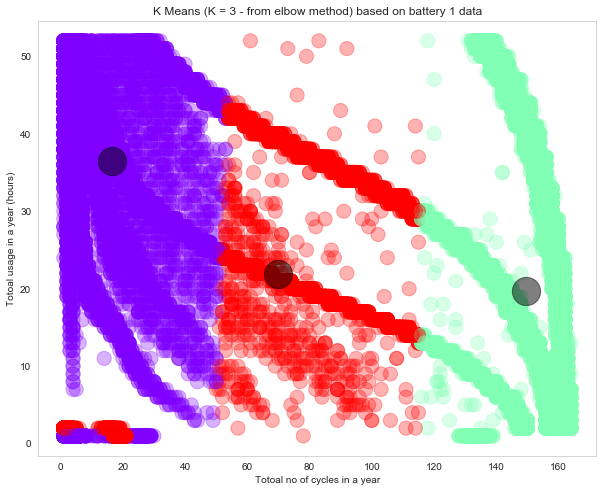

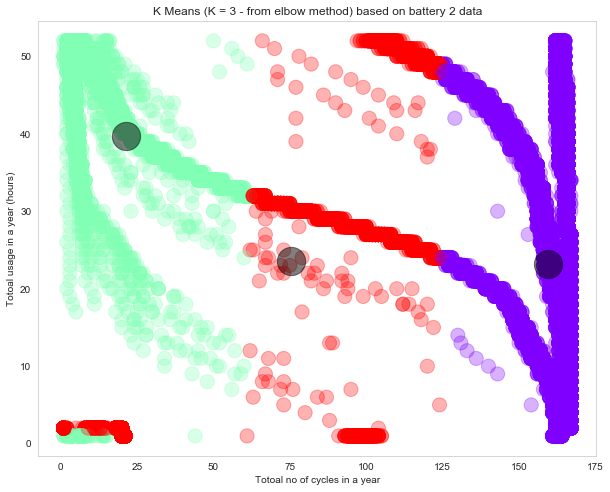

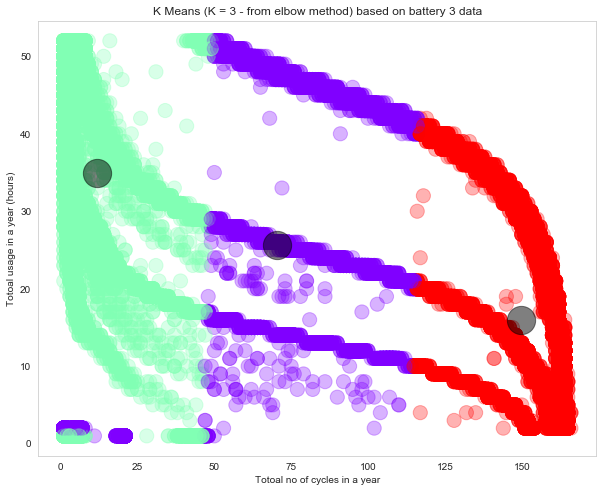

In [60]:
for bt in range(bat_no):
    
    f, ax1 = plt.subplots(nrows = 1, ncols = 1, sharey=True, figsize = (10,8))

    # For fitted with kmeans 
    ax1.set_title('K Means (K = 3 - from elbow method) based on battery {} data'.format(str(bt+1)))

    ax1.scatter(ml_data[bt].Battery_Status_2,ml_data[bt].week, 
            c = kmeans[bt].labels_, cmap='rainbow', s = 200, alpha=0.3)

    ax1.set_ylabel('Totoal usage in a year (hours)')
    ax1.set_xlabel('Totoal no of cycles in a year')
#    ax1.set_xlim(0, 180)

    # Good to have computed cluster centriods on the plots!
    ax1.scatter(x=centers[bt][:, 1], y=centers[bt][:, 2],c='black',s = 800, alpha=0.5);

    f.savefig('{}{}kmeans_clusters_ml_bat{}.png'.format(plotsfolder,os.sep,str(bt+1)))
    
   

**From the above plots, we see that the model works good and give us three clusters based on the provided features. The cluster centeroids are slightly shifted because of the outliers (anomalies), these data points were intentionally left in the model training to see their effect.**

## Thank you!